In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path, index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
df.shape

(1252, 6)

In [4]:
df[df['IsTrading']==True]

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
df = df[df['IsTrading']==True]
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
df.isnull().sum()

CoinName             0
Algorithm            0
IsTrading            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1144 entries, 42 to XBC
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1144 non-null   object 
 1   Algorithm        1144 non-null   object 
 2   IsTrading        1144 non-null   bool   
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 54.7+ KB


In [8]:
crypto_df = df.dropna()

In [9]:
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000


In [10]:
crypto_df = crypto_df[crypto_df['TotalCoinsMined']>0]

In [11]:
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [12]:
crypto_df.drop(['IsTrading','CoinName'], axis=1, inplace=True)

In [13]:
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [14]:
for i in crypto_df.columns:
    print(f'{i}: {crypto_df[i].nunique()}')

Algorithm: 71
ProofType: 25
TotalCoinsMined: 518
TotalCoinSupply: 280


In [15]:
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Standarize data with StandarScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [17]:
X_scaled.shape

(532, 98)

In [18]:
# Applying PCA to reduce dimensions and preserve 90% of the data
from sklearn.decomposition import PCA
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
X_pca = pca.fit_transform(X_scaled)

In [19]:
X_pca.shape

(532, 74)

In [20]:
# Initialize t-SNE model on the dataframe X_pca to further reduce dimensions to 2
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50)

In [21]:
# Reduce dimensions
X_pca_tsne_features = tsne.fit_transform(X_pca)
X_pca_tsne_features

array([[  3.7768881,   9.148628 ],
       [  7.727624 ,  10.468268 ],
       [  8.616453 ,  16.048954 ],
       ...,
       [-12.849622 ,   4.689382 ],
       [-13.972788 ,  -1.3958274],
       [  2.4822743,  -7.3201356]], dtype=float32)

In [22]:
X_pca_tsne_features.shape

(532, 2)

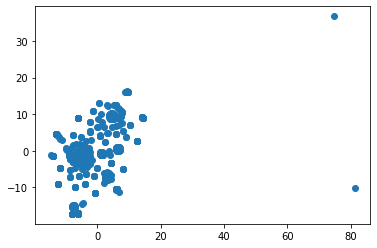

In [23]:
# Prepare to plot the dataset
plt.scatter(X_pca_tsne_features[:, 0], X_pca_tsne_features[:,1])
plt.show()

In [24]:
# Perform KMeans on the pca'd tsne'd features of X
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca_tsne_features)
#     km.predict
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
X_pca_tsne_features_elbow = pd.DataFrame(elbow_data)
X_pca_tsne_features_elbow.head(10)

,k,inertia
0,1,78476.968750
1,2,42353.617188
2,3,31757.875000
3,4,21558.861328
4,5,14058.488281
5,6,11681.381836
6,7,9860.374023
7,8,8532.290039
8,9,7031.668945
9,10,5911.376953


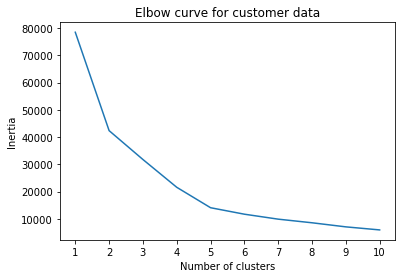

In [25]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(X_pca_tsne_features_elbow['k'], X_pca_tsne_features_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [26]:
#initialize the kmeans model using K number as 7 as it looks like the elbow of the curve.
model = KMeans(n_clusters=7, random_state=0)
model.fit(X_pca_tsne_features)

KMeans(n_clusters=7, random_state=0)

In [27]:
#predict clusters
predictions = model.predict(X_pca_tsne_features)
predictions

array([6, 6, 6, 3, 5, 5, 2, 3, 5, 5, 1, 5, 3, 3, 5, 6, 2, 5, 6, 6, 5, 5,
       3, 5, 5, 6, 6, 0, 5, 6, 5, 6, 5, 2, 6, 0, 5, 3, 5, 5, 5, 5, 1, 5,
       5, 0, 5, 5, 5, 6, 2, 5, 2, 3, 5, 5, 5, 6, 5, 5, 1, 5, 3, 1, 6, 5,
       3, 5, 6, 0, 6, 6, 6, 5, 5, 5, 2, 2, 3, 5, 3, 2, 2, 3, 3, 3, 2, 6,
       6, 5, 5, 1, 5, 2, 5, 3, 6, 6, 0, 0, 6, 1, 5, 3, 0, 5, 1, 5, 6, 5,
       1, 5, 6, 6, 5, 0, 2, 5, 0, 5, 6, 5, 5, 5, 3, 5, 2, 6, 2, 5, 3, 6,
       2, 2, 5, 5, 1, 5, 6, 5, 3, 6, 2, 3, 2, 5, 0, 3, 2, 5, 3, 3, 2, 6,
       1, 2, 5, 5, 0, 2, 1, 3, 6, 1, 5, 2, 2, 3, 3, 2, 2, 5, 0, 6, 6, 6,
       6, 2, 2, 5, 2, 6, 0, 3, 3, 2, 6, 5, 6, 5, 1, 3, 5, 5, 2, 1, 6, 2,
       1, 1, 6, 6, 1, 2, 5, 5, 1, 2, 5, 2, 6, 2, 1, 6, 6, 2, 1, 2, 3, 6,
       2, 6, 6, 2, 0, 6, 1, 6, 6, 6, 0, 5, 0, 5, 6, 3, 2, 6, 2, 6, 3, 1,
       0, 5, 6, 2, 5, 6, 5, 5, 1, 5, 2, 6, 2, 5, 1, 2, 2, 1, 2, 6, 6, 6,
       3, 2, 5, 1, 3, 1, 6, 6, 3, 5, 0, 3, 6, 5, 5, 5, 0, 2, 2, 2, 6, 5,
       6, 5, 2, 2, 6, 0, 6, 5, 5, 6, 1, 2, 6, 3, 2,

In [28]:
crypto_df['Class'] = predictions
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,6
404,Scrypt,PoW/PoS,1.055185e+09,532000000,6
1337,X13,PoW/PoS,2.927942e+10,314159265359,6
BTC,SHA-256,PoW,1.792718e+07,21000000,3
ETH,Ethash,PoW,1.076842e+08,0,5


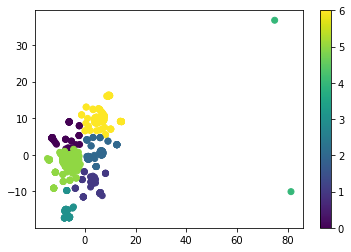

In [29]:
#plot the reduced dimensions from tsne and colorcode them with the labels
plt.scatter(X_pca_tsne_features[:, 0], X_pca_tsne_features[:,1], c = model.labels_ )
plt.colorbar()
plt.show()


The crypto currency dataset has no clear clusters to differentiate. The data majorly is a big blob of many clusters. 